In [8]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [9]:
import numpy as np

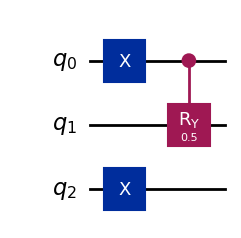

In [10]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',1)

qc = QuantumCircuit(3)

qc.x(0)
#qc.rx(p[0],1)
qc.cry(p[0],0,1)
qc.x(2)



#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [11]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._free_parameters",test._free_parameters)

self._qiskit_circuit         ┌───┐                           
q_0: ───┤ X ├──────■─────────────────■──
     ┌──┴───┴───┐┌─┴─┐┌───────────┐┌─┴─┐
q_1: ┤ Ry(0.25) ├┤ X ├┤ Ry(-0.25) ├┤ X ├
     └──┬───┬───┘└───┘└───────────┘└───┘
q_2: ───┤ X ├───────────────────────────
        └───┘                           
wires [0]
wires [1]
len(op.operation.params) 1
angle -0.25
type(angle) <class 'float'>
wires [0, 1]
wires [1]
len(op.operation.params) 1
angle 0.25
type(angle) <class 'float'>
wires [0, 1]
wires [2]
test._operation_list [<function qulacs_gate_x at 0x000001571AB488B0>, <function qulacs_gate_ry at 0x000001571B3325E0>, <function qulacs_gate_cnot at 0x000001571B3323A0>, <function qulacs_gate_ry at 0x000001571B3325E0>, <function qulacs_gate_cnot at 0x000001571B3323A0>, <function qulacs_gate_x at 0x000001571AB488B0>]
test._param_list [None, -0.25, None, 0.25, None, None]
test._qubit_list [[0], [1], [0, 1], [1], [0, 1], [2]]
test._func_list [None, None, None, None, None, None]
test._func_gr

In [12]:
test.get_circuit_func()

<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(parameter)>

In [13]:
param = np.array([0.5])

circ = test.get_circuit_func()(param)

state = QuantumState(3)
sim = QuantumCircuitSimulator(circ, state)
sim.initialize_state(0)
sim.simulate()

observable = Observable(3)
observable.add_operator(1.0, "Z 2 Z 1 Z 0")

print(sim.get_expectation_value(observable))



Adding X gate on qubit 0
Adding RY gate with angle -0.25 on qubit 1
Adding CNOT gate with control qubit 0 and target qubit 1
Adding RY gate with angle 0.25 on qubit 1
Adding CNOT gate with control qubit 0 and target qubit 1
Adding X gate on qubit 2
(0.8775825618903726+0j)


In [14]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp



est = Estimator()

est.run(qc,SparsePauliOp('ZZZ',),param).result().values

C:\Users\DKR\AppData\Local\Temp\ipykernel_7964\940498755.py:6: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  est = Estimator()


ValueError: The number of values (1) does not match the number of parameters (0) for the 0-th circuit.